<a href="https://colab.research.google.com/github/Nikeetaa24/Healthapp_GoogleGeminiLLM/blob/main/CODTECH_Internship_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Week: 1 Task (Decision Tree)

Model Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



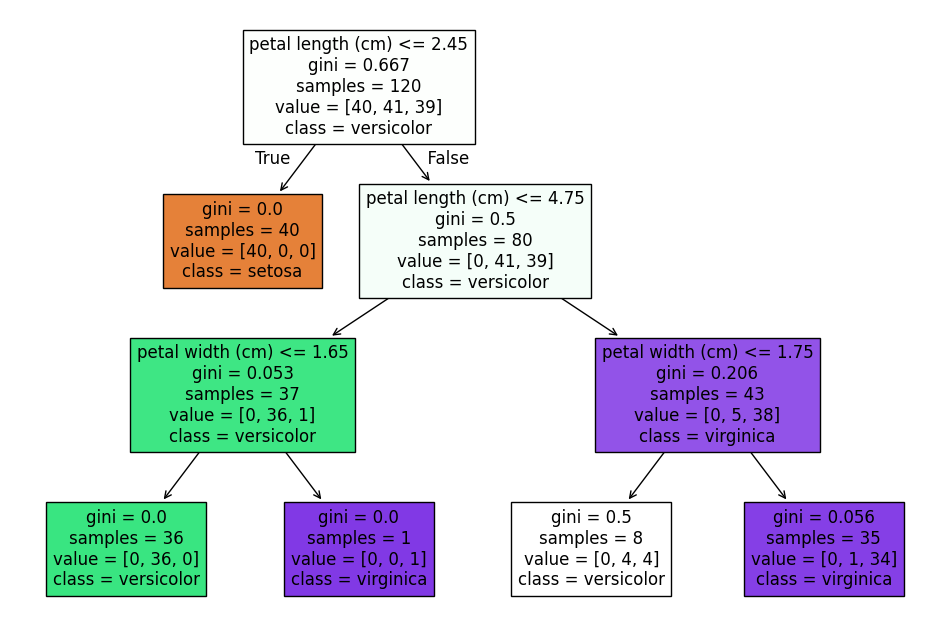

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset (Iris dataset as an example)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()



Week: 2 Task (Sentiment Analysis With NLP)


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


                                              review  sentiment
0  plot : two teen couples go to a church party ,...          0
1  the happy bastard ' s quick movie review damn ...          0
2  it is movies like these that make a jaded movi...          0
3  " quest for camelot " is warner bros . ' first...          0
4  synopsis : a mentally unstable man undergoing ...          0
Model Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       199
           1       0.82      0.82      0.82       201

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



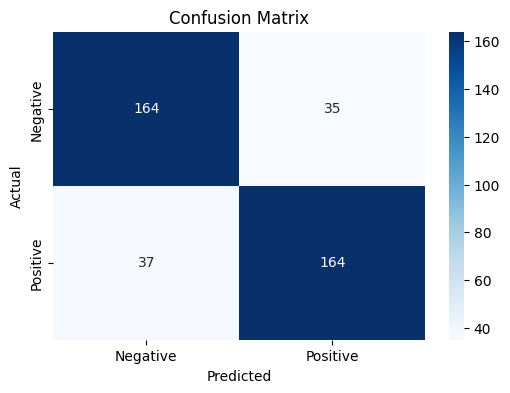

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import movie_reviews

# Download dataset (built-in)
nltk.download('movie_reviews')

# Load IMDb dataset from nltk
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Convert to DataFrame
df = pd.DataFrame(documents, columns=['review', 'sentiment'])

# Convert list of words into a single string for each review
df['review'] = df['review'].apply(lambda x: " ".join(x))

# Map sentiments to binary labels (pos -> 1, neg -> 0)
df['sentiment'] = df['sentiment'].map({'pos': 1, 'neg': 0})

# Display dataset sample
print(df.head())

# Text Preprocessing Function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    return text

# Apply text preprocessing
df['cleaned_text'] = df['review'].apply(clean_text)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df['cleaned_text'])

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['sentiment'], test_size=0.2, random_state=42)

# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



Week: 3 Task (Image Classification Model)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


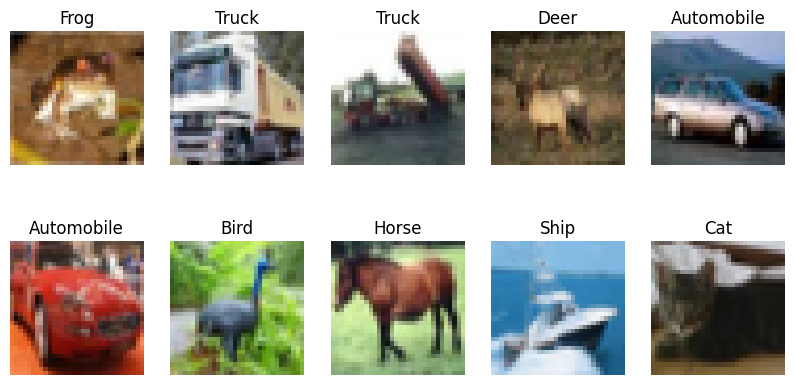

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.4145 - loss: 1.6184 - val_accuracy: 0.6028 - val_loss: 1.1307
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - accuracy: 0.6242 - loss: 1.0757 - val_accuracy: 0.6513 - val_loss: 1.0102
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 24ms/step - accuracy: 0.6781 - loss: 0.9263 - val_accuracy: 0.6694 - val_loss: 0.9595
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.7120 - loss: 0.8156 - val_accuracy: 0.6623 - val_loss: 0.9957
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.7454 - loss: 0.7272 - val_accuracy: 0.6957 - val_loss: 0.9038
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.7765 - loss: 0.6375 - val_accuracy: 0.6926 - val_loss: 0.9438
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.8047 - loss: 0.5611 - val_accuracy: 0.6976 - val_loss: 0.9228
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.8247 -

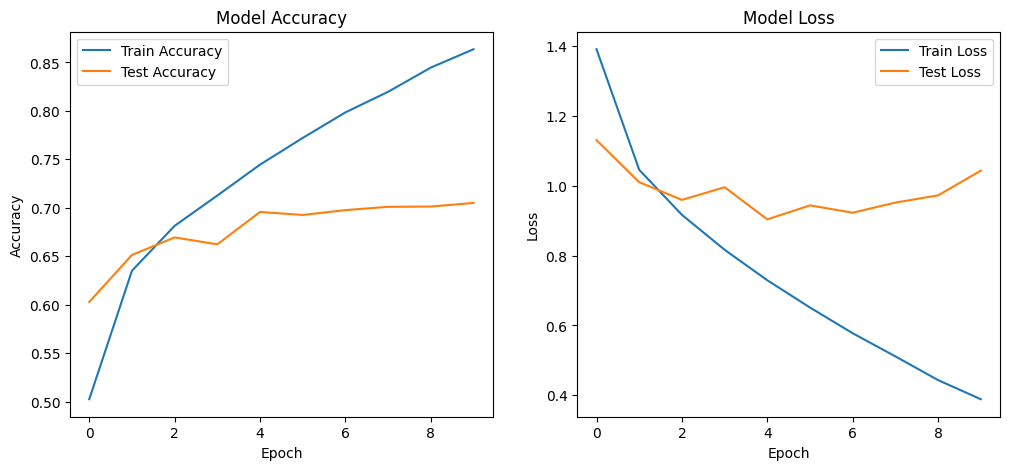

In [6]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset (built-in)
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values (scale between 0 and 1)
X_train, X_test = X_train / 255.0, X_test / 255.0

# Define class names (CIFAR-10 categories)
class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

# Display some sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis("off")
plt.show()

# Build a CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # 10 output classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate model on test dataset
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc:.2f}")

# Plot accuracy and loss graphs
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Model Accuracy")

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Model Loss")

plt.show()



Week: 4 Task (Recommendation System)

In [8]:
# Install and import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity

# Load built-in MovieLens dataset from Colab
column_names = ["user_id", "movie_id", "rating", "timestamp"]
df = pd.read_csv("https://files.grouplens.org/datasets/movielens/ml-100k/u.data", sep="\t", names=column_names)

# Drop timestamp column
df = df.drop(columns=["timestamp"])

# Convert to pivot table (User-Item Matrix)
user_movie_matrix = df.pivot(index="user_id", columns="movie_id", values="rating").fillna(0)

# Convert to sparse matrix for efficiency
sparse_matrix = csr_matrix(user_movie_matrix.values)

# Compute Cosine Similarity between users
user_similarity = cosine_similarity(sparse_matrix)

# Function to recommend movies based on similar users
def get_recommendations(user_id, num_recommendations=5):
    user_index = user_id - 1  # Adjust index (since user IDs start from 1)
    similar_users = np.argsort(-user_similarity[user_index])[1:6]  # Get top 5 similar users

    # Get movies rated by similar users
    similar_users_ratings = user_movie_matrix.iloc[similar_users].mean(axis=0)

    # Sort and get top recommended movies
    recommended_movies = similar_users_ratings.sort_values(ascending=False).head(num_recommendations)

    return recommended_movies

# Get recommendations for a sample user (e.g., User ID: 50)
user_id = 50
recommended_movies = get_recommendations(user_id)

# Display recommendations
print(f"\nTop Movie Recommendations for User {user_id}:")
print(recommended_movies)



Top Movie Recommendations for User 50:
movie_id
475    4.0
276    3.6
9      3.4
293    3.4
50     3.4
dtype: float64
